In [1]:
# mac run: source env/bin/activate
# windows run: env\Scripts\activate

import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

import matplotlib.pyplot as plt

import folium
from IPython.display import display

In [2]:
weatherstation = pd.read_csv('data/gis_weatherstation_shape_2024_10_04.csv')
weatherstation.head()

,objectid,weatherstationcode,weatherstationname,scadartuid,structureid,nwszone,district,thomasbrospagegrid,constructionstatus,creationuser,...,elevation,twinguid,hftd,zone1idc,hftdidc,gdb_geomattr_data,globalid,shape,shape_srid,snapshot_date
0,1,CBD,Carlsbad,5158.0,P124785,Coastal-243,6.0,1126-G1,A,seu_gis_elec,...,72,NaN,1,N,N,NaN,{ED5DE7F2-F63A-41EA-BA80-9F71495334A3},POINT (1540299.9388 12029375.0425),4431,10/4/2024
1,2,CCR,Cuca Ranch,1915.0,Z118027,Mountain-258,3.0,1052-A5,A,seu_gis_elec,...,2513,NaN,3,N,Y,NaN,{82759049-437B-4A5C-8796-10C8D7098C5B},POINT (1667010.27856 12088881.1767),4431,10/4/2024
2,3,CES,Country Estates,1995.0,Z416611,Inland Valley-250,3.0,1153-G7,A,seu_gis_elec,...,1822,NaN,3,N,Y,NaN,{6A3A6DAD-6CD1-43B7-A0FE-72A52A46A4F7},POINT (1703876.2967 11989778.75946),4431,10/4/2024
3,208,ROV,Rim of the Valley,4818.0,Z416170,Inland Valley-250,3.0,1071-B1,A,gwharris,...,1533,NaN,3,N,Y,NaN,{AD1AEA81-BC74-4954-8D25-421C79F40D88},POINT (1646528.56915 12083236.45575),4431,10/4/2024
4,5,CHO,Chollas Lake,5182.0,P970712,Inland Valley-250,1.0,1270-C7,A,seu_gis_elec,...,448,NaN,1,N,N,NaN,{1294A90A-9558-458E-8EA5-9D15B2A16D8D},POINT (1619955.10724 11883209.4286),4431,10/4/2024


In [3]:
weatherstation['geometry'] = weatherstation.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
weatherstation['geometry']

0      POINT (-117.327141 33.137352)
1      POINT (-116.912993 33.301305)
2        POINT (-116.79285 33.02876)
3       POINT (-116.980023 33.28582)
4       POINT (-117.06659 32.736035)
                   ...              
218    POINT (-116.557345 32.658194)
219    POINT (-116.701321 32.673289)
220    POINT (-116.972033 33.016832)
221     POINT (-117.01553 33.284635)
222      POINT (-116.87089 33.01566)
Name: geometry, Length: 223, dtype: object

In [4]:
gdf_weatherstation = gpd.GeoDataFrame(weatherstation, geometry='geometry')
gdf_weatherstation.crs = 'EPSG:4326'

gdf_weatherstation = gdf_weatherstation.to_crs(epsg=4326)

In [5]:
gdf_weatherstation.head()

,objectid,weatherstationcode,weatherstationname,scadartuid,structureid,nwszone,district,thomasbrospagegrid,constructionstatus,creationuser,...,twinguid,hftd,zone1idc,hftdidc,gdb_geomattr_data,globalid,shape,shape_srid,snapshot_date,geometry
0,1,CBD,Carlsbad,5158.0,P124785,Coastal-243,6.0,1126-G1,A,seu_gis_elec,...,NaN,1,N,N,NaN,{ED5DE7F2-F63A-41EA-BA80-9F71495334A3},POINT (1540299.9388 12029375.0425),4431,10/4/2024,POINT (-117.32714 33.13735)
1,2,CCR,Cuca Ranch,1915.0,Z118027,Mountain-258,3.0,1052-A5,A,seu_gis_elec,...,NaN,3,N,Y,NaN,{82759049-437B-4A5C-8796-10C8D7098C5B},POINT (1667010.27856 12088881.1767),4431,10/4/2024,POINT (-116.91299 33.3013)
2,3,CES,Country Estates,1995.0,Z416611,Inland Valley-250,3.0,1153-G7,A,seu_gis_elec,...,NaN,3,N,Y,NaN,{6A3A6DAD-6CD1-43B7-A0FE-72A52A46A4F7},POINT (1703876.2967 11989778.75946),4431,10/4/2024,POINT (-116.79285 33.02876)
3,208,ROV,Rim of the Valley,4818.0,Z416170,Inland Valley-250,3.0,1071-B1,A,gwharris,...,NaN,3,N,Y,NaN,{AD1AEA81-BC74-4954-8D25-421C79F40D88},POINT (1646528.56915 12083236.45575),4431,10/4/2024,POINT (-116.98002 33.28582)
4,5,CHO,Chollas Lake,5182.0,P970712,Inland Valley-250,1.0,1270-C7,A,seu_gis_elec,...,NaN,1,N,N,NaN,{1294A90A-9558-458E-8EA5-9D15B2A16D8D},POINT (1619955.10724 11883209.4286),4431,10/4/2024,POINT (-117.06659 32.73604)


In [6]:
gdf_weatherstation.columns

Index(['objectid', 'weatherstationcode', 'weatherstationname', 'scadartuid',
       'structureid', 'nwszone', 'district', 'thomasbrospagegrid',
       'constructionstatus', 'creationuser', 'datecreated', 'datemodified',
       'lastuser', 'structureguid', 'symbolrotation', 'latitude', 'longitude',
       'elevation', 'twinguid', 'hftd', 'zone1idc', 'hftdidc',
       'gdb_geomattr_data', 'globalid', 'shape', 'shape_srid', 'snapshot_date',
       'geometry'],
      dtype='object')

info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   objectid            223 non-null    int64   
 1   weatherstationcode  223 non-null    object  
 2   weatherstationname  223 non-null    object  
 3   scadartuid          222 non-null    float64 
 4   structureid         218 non-null    object  
 5   nwszone             223 non-null    object  
 6   district            220 non-null    float64 
 7   thomasbrospagegrid  221 non-null    object  
 8   constructionstatus  223 non-null    object  
 9   creationuser        223 non-null    object  
 10  datecreated         223 non-null    object  
 11  datemodified        219 non-null    object  
 12  lastuser            219 non-null    object  
 13  structureguid       217 non-null    object  
 14  symbolrotation      223 non-null    int64   
 15  latitude            223 no

<Axes: >

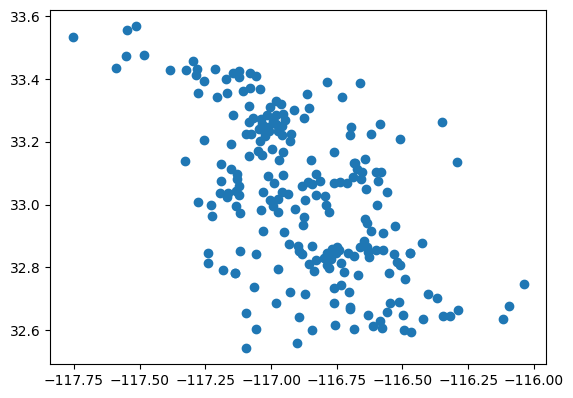

In [7]:
# Structure and data types
print('info:')
print(gdf_weatherstation.info())

# Summary statistics
print('')
print('describe:')
print(gdf_weatherstation.describe())

# Missing values
print('')
print('missing values:')
print(gdf_weatherstation.isnull().sum())

# Visualize the geometries
print('')
gdf_weatherstation.plot()


In [8]:
# Create a base map
m = folium.Map(location=[gdf_weatherstation.geometry.y.mean(), gdf_weatherstation.geometry.x.mean()], zoom_start=6)

# Add GeoDataFrame to the map
folium.GeoJson(gdf_weatherstation).add_to(m)

display(m)

# Show the map
m.save('map.html')


In [10]:
meteorology_summary = pd.read_csv('data/src_wings_meteorology_station_summary_snapshot_2023_08_02.csv')
print(meteorology_summary.columns)

cols_meteorology = set(meteorology_summary.columns)
cols_df1 = set(gdf_weatherstation.columns)

# Find the intersection of the two sets (common columns)
print('intersection: ', cols_meteorology.intersection(cols_df1))

meteorology_summary.head()

Index(['station', 'vri', 'alert', 'max_gust', '99th', '95th', 'snapshot_date'], dtype='object')
intersection:  {'snapshot_date'}


,station,vri,alert,max_gust,99th,95th,snapshot_date
0,AMO,H,35,40,32,24,2023-08-02
1,ANE,M,35,43,32,25,2023-08-02
2,ARH,L,40,46,40,31,2023-08-02
3,AVO,H,35,43,29,24,2023-08-02
4,AVY,L,45,62,53,40,2023-08-02


In [12]:
meteorology_windspeed = pd.read_csv('data/src_wings_meteorology_windspeed_snapshot_2023_08_02.csv')
print(meteorology_windspeed.columns)

cols_windspeed = set(meteorology_windspeed.columns)
cols_df1 = set(gdf_weatherstation.columns)

# Find the intersection of the two sets (common columns)
print('intersection: ', cols_meteorology.intersection(cols_df1))

meteorology_windspeed.head()

Index(['date', 'wind_speed', 'station', 'snapshot_date'], dtype='object')
intersection:  {'snapshot_date'}


,date,wind_speed,station,snapshot_date
0,9/14/2012,19.0,AMO,8/2/2023
1,9/15/2012,20.0,AMO,8/2/2023
2,10/14/2012,16.0,AMO,8/2/2023
3,10/26/2012,23.0,AMO,8/2/2023
4,10/27/2012,15.0,AMO,8/2/2023
